# 线性回归

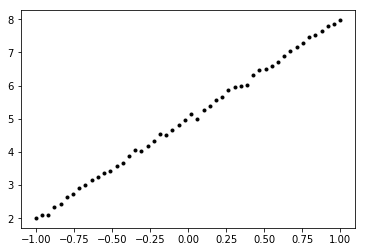

49 [2.491038, 4.9662104, 4.780608]
99 [2.9172575, 4.991805, 0.29524446]
149 [2.9901838, 4.9919357, 0.16490158]
199 [3.0026617, 4.9919357, 0.1610856]
249 [3.0047965, 4.9919357, 0.16097392]
299 [3.0051622, 4.9919357, 0.16097067]
349 [3.0052242, 4.9919357, 0.16097042]
399 [3.005234, 4.9919357, 0.1609704]
449 [3.005234, 4.9919357, 0.1609704]
499 [3.005234, 4.9919357, 0.1609704]
549 [3.005234, 4.9919357, 0.1609704]
599 [3.005234, 4.9919357, 0.1609704]
649 [3.005234, 4.9919357, 0.1609704]
699 [3.005234, 4.9919357, 0.1609704]
749 [3.005234, 4.9919357, 0.1609704]
799 [3.005234, 4.9919357, 0.1609704]
849 [3.005234, 4.9919357, 0.1609704]
899 [3.005234, 4.9919357, 0.1609704]
949 [3.005234, 4.9919357, 0.1609704]
999 [3.005234, 4.9919357, 0.1609704]
this model is y= 3.005234  * x + 4.9919357


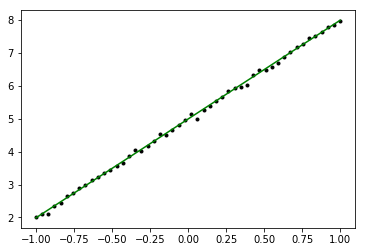

In [1]:
# -*- coding: utf-8 -*-

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

learning_rate=0.001  #学习率
training_epochs=1000 #训练次数

np.set_printoptions(threshold='nan')                    #打印内容不限制长度
t_x = np.linspace(-1,1,50,dtype = np.float32)
noise = np.random.normal(0 , 0.05 ,t_x.shape)
noise=noise.astype(np.float32)
t_y = t_x * 3.0+5.0+noise


plt.plot(t_x,t_y,'k.')
plt.show()


x = tf.placeholder(tf.float32,name='x')
y = tf.placeholder(tf.float32,name='y')

a = tf.Variable(0.0)
b = tf.Variable(0.0)

curr_y = x * a +  b
loss =   tf.reduce_sum(tf.square(curr_y - y) )    #损失函数，实际输出数据和训练输出数据的方差
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)       #训练的结果是使得损失函数最小

sess = tf.Session()                                     #创建 Session
sess.run(tf.global_variables_initializer())             #变量初始化
for i in range(training_epochs):     

        sess.run(train, {x:t_x, y:t_y})
        if (i+1) % 50==0:        
            print (i,sess.run([a,b,loss],{x:t_x, y:t_y}))
           

a_val=sess.run(a)
b_val=sess.run(b)
print("this model is y=",a_val," * x +",b_val)
sess.close()

y_learned=t_x*a_val+b_val
plt.plot(t_x,t_y,'k.')
plt.plot(t_x,y_learned,'g-')
plt.show()
plt.close()


    
   

# 多元线性回归

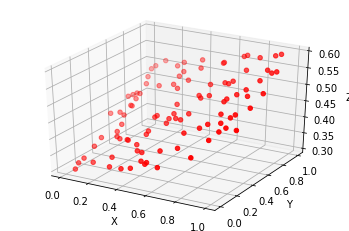

20 
 0.26225454 0.34104025 
 0.1370829
40 
 0.14245854 0.23937793 
 0.25598314
60 
 0.11119544 0.21089546 
 0.28810665
80 
 0.102969594 0.20299546 
 0.29678622
100 
 0.10079132 0.20081976 
 0.29913154
120 
 0.1002116 0.20022358 
 0.29976535
140 
 0.100056745 0.20006084 
 0.2999366
160 
 0.10001524 0.20001654 
 0.29998288
180 
 0.1000041 0.20000449 
 0.2999954
200 
 0.10000111 0.20000122 
 0.29999876
220 
 0.10000029 0.20000035 
 0.29999968
240 
 0.1000001 0.20000012 
 0.2999999
260 
 0.1000001 0.20000012 
 0.2999999
280 
 0.1000001 0.20000012 
 0.2999999
300 
 0.1000001 0.20000012 
 0.2999999
320 
 0.1000001 0.20000012 
 0.2999999
340 
 0.1000001 0.20000012 
 0.2999999
360 
 0.1000001 0.20000012 
 0.2999999
380 
 0.1000001 0.20000012 
 0.2999999
400 
 0.1000001 0.20000012 
 0.2999999
420 
 0.1000001 0.20000012 
 0.2999999
440 
 0.1000001 0.20000012 
 0.2999999
460 
 0.1000001 0.20000012 
 0.2999999
480 
 0.1000001 0.20000012 
 0.2999999
500 
 0.1000001 0.20000012 
 0.2999999
520 
 0.10

In [2]:
# -*- coding: utf-8 -*-
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

learning_rate=0.5  #学习率
training_epochs=1000 #训练次数

np.set_printoptions(threshold='nan')                    #打印内容不限制长度


x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot(np.float32([0.100, 0.200]), x_data) + 0.300

#绘制三维散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 创建一个三维的绘图工程
ax.scatter(x_data[0][:99],x_data[1][:99], y_data[:99], c='r')  # 绘制数据点

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()
plt.close()

x = tf.placeholder(tf.float32,[None,None],name='x')
y = tf.placeholder(tf.float32,[None,None],name='y')

W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = tf.matmul(W, x_data) + b 
loss = tf.reduce_mean(tf.square(y - y_data))

# 优化目标函数
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

# 初始化所有变量
init =tf.global_variables_initializer()
 
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,training_epochs):
        sess.run(train)        
        preW= sess.run(W)        
        preb= sess.run(b)
        if step % 20 == 0:
            print (step,'\n',preW[0][0],preW[0][1],'\n',preb[0])
sess.close()        



# 逻辑回归


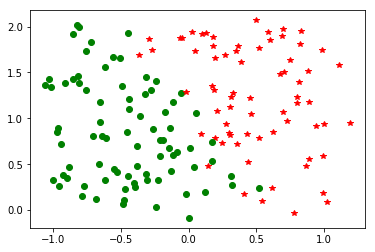

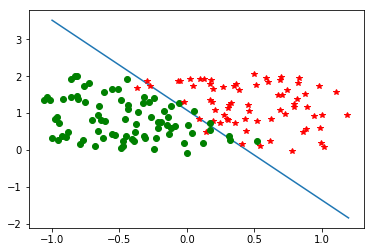

In [5]:
# -*- coding: utf-8 -*-

import tensorflow as tf  
import matplotlib.pyplot as plt  
import numpy as np  
  
data=[]  
label=[]  
np.random.seed(0) 
  
##随机产生训练集  
for i in range(150):  
    x1=np.random.uniform(-1,1)  
    x2=np.random.uniform(0,2)  
    if x1*2+ x2<=1:  
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])  
        label.append(0)
        plt.plot(data[i][0],data[i][1],'go')
    else:  
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])  
        label.append(1) 
        plt.plot(data[i][0],data[i][1],'r*') 
##绘制图形
data=np.hstack(data).reshape(-1,2)  
label=np.hstack(label).reshape(-1,1)
plt.show()  
  

#定义变量
x=tf.placeholder(tf.float32,shape=(None,2))  
y_=tf.placeholder(tf.float32,shape=(None,1)) 

W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

#逻辑回归模型
sample_size=len(data) 
y = tf.sigmoid(tf.matmul(x, W) + b)
#计算损失值
cross_entropy = -tf.reduce_sum(y_ * tf.log(y) + (1-y_) * tf.log(1-y))/sample_size

#训练模型
#优化器使用梯度下降
learning_rate = 0.01    #学习率
cost_prev=0
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(40001):
    sess.run(train_step, feed_dict={x:data, y_:label})
    train_cost=sess.run(cross_entropy, feed_dict={x:data, y_:label})
    if np.abs(cost_prev-train_cost)<1e-6:
        break
    cost_prev=train_cost    
    if i % 2000==0:        
           sess.run([W,b,cross_entropy],{x:data, y_:label})
#记录最终的w、b值    
W_val=sess.run(W)
b_val=sess.run(b)
sess.close()

#绘制直线和散点图
w1=W_val[0,0]
w2=W_val[1,0]
k=-w1/w2
b=-b_val/w2
xx=np.linspace(-1,1.2,100)
yy=k*xx+b
plt.plot(xx,yy)
for i in range(150):  
    if( label[i]==0):        
        plt.plot(data[i][0],data[i][1],'go')
    else:        
        plt.plot(data[i][0],data[i][1],'r*') 
    

plt.show() 



# 支持向量机

### 线性回归

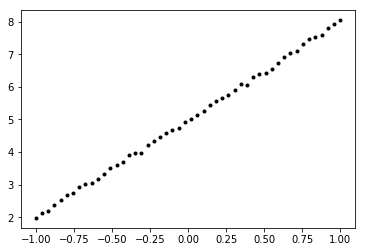

0 [0.0, 0.05, 172.30019]
20 [0.025938775, 1.023, 124.94591]
40 [0.15548979, 1.8709999, 88.1571]
60 [0.35612246, 2.6000009, 59.622658]
80 [0.5972654, 3.2140012, 37.881783]
100 [0.85110253, 3.7120016, 22.263578]
120 [1.0942658, 4.1090026, 11.407094]
140 [1.2994696, 4.392002, 5.263931]
160 [1.4584893, 4.586004, 2.116849]
180 [1.5745099, 4.717004, 0.59263706]
200 [1.6329392, 4.778, 0.23714828]
220 [1.673797, 4.819997, 0.049576283]
240 [1.693798, 4.8399954, 0.0095767975]
260 [1.6987982, 4.844995, 0.0]
280 [1.6987982, 4.844995, 0.0]
300 [1.6987982, 4.844995, 0.0]
320 [1.6987982, 4.844995, 0.0]
340 [1.6987982, 4.844995, 0.0]
360 [1.6987982, 4.844995, 0.0]
380 [1.6987982, 4.844995, 0.0]
400 [1.6987982, 4.844995, 0.0]
420 [1.6987982, 4.844995, 0.0]
440 [1.6987982, 4.844995, 0.0]
460 [1.6987982, 4.844995, 0.0]
480 [1.6987982, 4.844995, 0.0]
500 [1.6987982, 4.844995, 0.0]
520 [1.6987982, 4.844995, 0.0]
540 [1.6987982, 4.844995, 0.0]
560 [1.6987982, 4.844995, 0.0]
580 [1.6987982, 4.844995, 0.0]
60

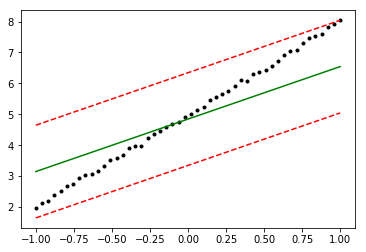

In [8]:
# -*- coding: utf-8 -*-
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

learning_rate=0.001  #学习率
training_epochs=1000 #训练次数
np.set_printoptions(threshold='nan')                    #打印内容不限制长度

#生成数据
t_x = np.linspace(-1,1,50,dtype = np.float32)
noise = np.random.normal(0 , 0.05 ,t_x.shape)
noise=noise.astype(np.float32)
t_y = t_x * 3.0+5.0+noise
plt.plot(t_x,t_y,'k.')
plt.show()

#设置模型

x = tf.placeholder(tf.float32,name='x')
y = tf.placeholder(tf.float32,name='y')

a = tf.Variable(0.0)
b = tf.Variable(0.0)

curr_y = x * a +  b
epsilon=tf.constant([1.5])
 #损失函数，
loss =   tf.reduce_sum( tf.maximum(0.,tf.subtract( tf.abs(tf.subtract(curr_y,y)),epsilon)))   
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)  
#训练数据     
sess = tf.Session()                                     #创建 Session
sess.run(tf.global_variables_initializer())             #变量初始化
for i in range(training_epochs):    

        sess.run(train, {x:t_x, y:t_y})
        if i % 20==0:        
            print (i,sess.run([a,b,loss],{x:t_x, y:t_y}))
           

a_val=sess.run(a)
b_val=sess.run(b)
linewidth=sess.run(epsilon)
print("this model is y=",a_val," * x +",b_val)
sess.close()

plt.plot(t_x,t_y,'k.')
#SVM拟合线
y_learned=t_x*a_val+b_val

plt.plot(t_x,y_learned,'g-')
plt.plot(t_x,y_learned+linewidth,'r--')
plt.plot(t_x,y_learned-linewidth,'r--')


plt.show()
plt.close()

### 逻辑线性回归

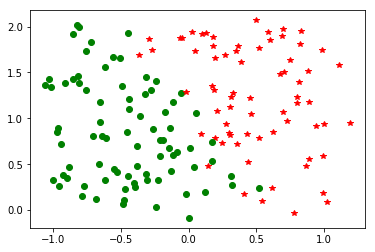

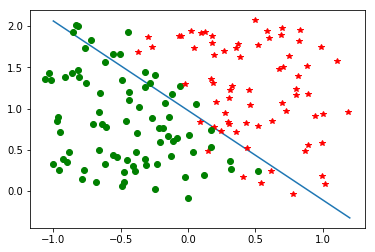

In [10]:
# -*- coding: utf-8 -*-

import tensorflow as tf  
import matplotlib.pyplot as plt  
import numpy as np  
  
data=[]  
label=[]
loss_vec=[] 
 
np.random.seed(0) 
  
##随机产生训练集  
for i in range(150):  
    x1=np.random.uniform(-1,1)  
    x2=np.random.uniform(0,2)  
    if x1*2+ x2<=1:   
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])  
        label.append(0)
        plt.plot(data[i][0],data[i][1],'go')
    else:  
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])  
        label.append(1) 
        plt.plot(data[i][0],data[i][1],'r*') 
##绘制图形
data=np.hstack(data).reshape(-1,2)  
label=np.hstack(label).reshape(-1,1)
plt.show()  
  

#定义变量
x=tf.placeholder(tf.float32,shape=(150,2))  
y_=tf.placeholder(tf.float32,shape=(None,1)) 

W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))



y = (tf.matmul(x, W) + b)
#计算L2范数
l2_norm = tf.reduce_sum(tf.square(W))
#损失函数
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(y, y_))))
cross_entropy = tf.add(classification_term, tf.multiply(alpha, l2_norm))

#训练模型
#优化器使用梯度下降
learning_rate = 0.01    #学习率
cost_prev=0
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(4000):
   sess.run(train_step, feed_dict={x:data, y_:label})
   train_cost=sess.run(cross_entropy, feed_dict={x:data, y_:label})
   loss_vec.append(train_cost)
   if i % 200==0:        
       sess.run([W,b,cross_entropy],{x:data, y_:label})
   if np.abs(cost_prev-train_cost)<1e-6:
       sess.run([W,b,cross_entropy],{x:data, y_:label})
       break
   else:
       cost_prev=train_cost
#记录最终的w、b值    
W_val=sess.run(W)
b_val=sess.run(b)
sess.close()

#绘制直线和散点图
w1=W_val[0,0]
w2=W_val[1,0]
k=-w1/w2
b=b_val
xx=np.linspace(-1,1.2,100)
yy=k*xx+b
plt.plot(xx,yy)
for i in range(150):  
    if( label[i]==0):        
        plt.plot(data[i][0],data[i][1],'go')
    else:        
        plt.plot(data[i][0],data[i][1],'r*') 
    

plt.show() 

### 高斯核函数

the step: 19 -37.923515
the step: 39 -57.923496
the step: 59 -77.923485
the step: 79 -97.92347
the step: 99 -117.92345
the step: 119 -137.92343
the step: 139 -157.92343
the step: 159 -177.92343
the step: 179 -197.92342
the step: 199 -217.92342
the step: 219 -237.92345
the step: 239 -257.92346
the step: 259 -277.9235
the step: 279 -297.92358
the step: 299 -317.9236


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


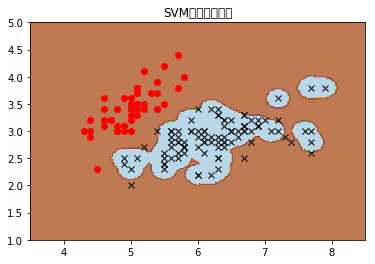

In [11]:
# -*- coding: utf-8 -*-


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
# Create graph
sess = tf.Session()


# 加载iris数据集并为每类分离目标值。
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[1]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])
class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]


batch_size = 100

# 分为两类
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[1,batch_size]))

# 高斯核函数只依赖x_data
gamma = tf.constant(-100.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))

my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

# 损失函数
model_output=tf.matmul(b,my_kernel)
first_term=tf.reduce_sum(b)
b_vec_corss=tf.matmul(tf.transpose(b),b)
y_target_cross=tf.matmul(y_target,tf.transpose(y_target))
second_term=tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_corss,y_target_cross)))
loss=tf.negative(tf.subtract(first_term,second_term))

#预测核函数
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

# 实现预测核函数后，我们创建预测函数。
prediction_output = tf.matmul(tf.multiply(tf.transpose( y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze( prediction),tf.squeeze(y_target) ), tf.float32))


my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)


init = tf.global_variables_initializer()
sess.run(init)


for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})

    if (i+1)%20==0:
        print('the step:',i,str(temp_loss))

# 创建数据点的预测网格，运行预测函数
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)


plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='山鸢尾')
plt.plot(class2_x, class2_y, 'kx', label='非山鸢尾')
plt.title('SVM鸢尾花二分类')
plt.ylim([1, 5.0])
plt.xlim([3.5, 8.5])
plt.show()


W0105 00:37:52.610080 140540518782784 deprecation.py:323] From <ipython-input-12-cad51b4359a5>:80: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


the step: 19 -238.37793
the step: 39 -508.37778
the step: 59 -778.37756
the step: 79 -1048.3773
the step: 99 -1318.3773
the step: 119 -1588.3777
the step: 139 -1858.3782
the step: 159 -2128.3794
the step: 179 -2398.3809
the step: 199 -2668.3826
the step: 219 -2938.3845
the step: 239 -3208.3853
the step: 259 -3478.3865
the step: 279 -3748.3865
the step: 299 -4018.385


W0105 00:37:53.457020 140540518782784 legend.py:1289] No handles with labels found to put in legend.


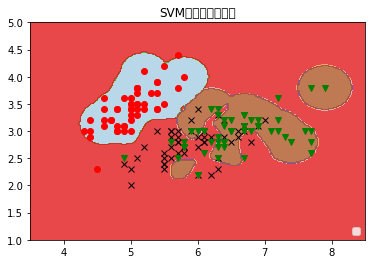

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  4 20:12:28 2018

@author: Administrator
"""

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
# Create graph
sess = tf.Session()

def reshape_matmul(mat):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [3, batch_size, 1])
    return(tf.matmul(v2, v1))

# 加载iris数据集并为每类分离目标值。
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[1]] for x in iris.data])
y_vals1 = np.array([1 if y==0 else -1 for y in iris.target])
y_vals2 = np.array([1 if y==1 else -1 for y in iris.target])
y_vals3 = np.array([1 if y==2 else -1 for y in iris.target])
y_vals = np.array([y_vals1, y_vals2, y_vals3])
class1_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==0]
class1_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==0]
class2_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==1]
class2_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==1]
class3_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==2]
class3_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==2]


batch_size = 50


# 数据集的维度在变化，从单类目标分类到三类目标分类。
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[3, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[3,batch_size]))

# 高斯核函数只依赖x_data
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])

sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))


my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))



# 计算对偶损失函数
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target)

second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term, second_term)))


# 现在创建预测核函数。
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

# 实现预测核函数后，我们创建预测函数。
prediction_output = tf.matmul(tf.multiply(y_target,b), pred_kernel)
prediction = tf.arg_max(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(y_target,0)), tf.float32))


my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)


init = tf.global_variables_initializer()
sess.run(init)


for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})

    if (i+1)%20==0:
        print('the step:',i,str(temp_loss))

# 创建数据点的预测网格，运行预测函数
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)


plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro')
plt.plot(class2_x, class2_y, 'kx')
plt.plot(class3_x, class3_y, 'gv')
plt.title('SVM实现鸢尾花分类')
plt.legend(loc='lower right')
plt.ylim([1, 5.0])
plt.xlim([3.5, 8.5])
plt.show()
